### Data Statistics:

In this script we obtain some basics statistics concerning our data-base made up of 11 group transcriptions. This analysis contains:

1. The distribution of utterances
2. The distribution of words 
3. Word frequency and word counting
4. Physics words frequency



In [21]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from numpy import array
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import re
import num2words
from keras.preprocessing.text import Tokenizer
%matplotlib inline

In [14]:
#Set local path of your computer where data files are saved
local_path = r'/Users/pablouribepizarro/Desktop/CIAE/CIBL'

files_path = []
# r=root, d=directories, f = files
for r, d, f in os.walk(local_path+'/Raw/inquiry_lessons'):
    for file in f:
        if '.xlsx' in file:
            files_path.append(os.path.join(r, file))
            
n_files = len(files_path)
print('Total Files: {}'.format(n_files))

Total Files: 11


In [15]:
#Build a list of data frames containing each group's transcription:
dfs = []
for path in files_path:
    df = pd.read_excel(path)
    df = df[np.isfinite(df['Phase'])]
    df['Phase'] = df['Phase'].astype(int)-1
    #Transform raw numbers into digits:
    df['Utterance'] = df['Utterance'].apply(lambda row: re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), row))
    #Consider '?' as a new word:
    df['Utterance'] = df['Utterance'].apply(lambda row: row.replace('?',' ?'))
    #Add the number of words:
    df['Number of Words'] = df.apply(lambda row: len(row['Utterance'].split()), axis = 1)
    dfs.append(df)
docs_size = pd.Series([df.shape[0] for df in dfs])
dfs[0].head()

,StudentID,Student,time_start,time_end,Phase,Phase_start,Phase_end,Utterance,Number of Words
0,O2,NaN,NaN,NaN,0,1.0,NaN,Satunnaiskävely.,1
1,O1,NaN,NaN,NaN,0,NaN,NaN,[lukee tehtävänantoa],2
2,O1,NaN,NaN,NaN,0,NaN,1.0,Voi voi. [käynnistää videon],4
3,O1,NaN,NaN,NaN,0,1.0,NaN,"Missä se vaeltaa siellä ? Onks se, ei. Ei, se ...",17
4,O2,NaN,NaN,NaN,0,NaN,NaN,[epäselvä],1


Mean #utterances per group: 180.0
Total #utterances: 1980


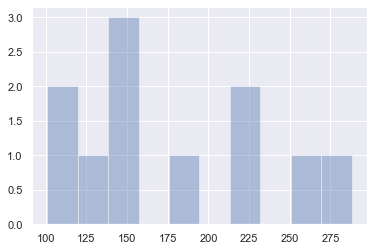

In [16]:
#Obtain the distribution of utterances in the data set:
sns.set(); 
ax = sns.distplot(docs_size,kde=False,bins=10)
print('Mean #utterances per group: '+str(docs_size.mean()))
print('Total #utterances: '+str(docs_size.sum()))

/Users/pablouribepizarro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


Mean number of words per utterance: 11.086363636363636
#Utterances with > 20 words: 254
#Utterances with < 20 words: 1700


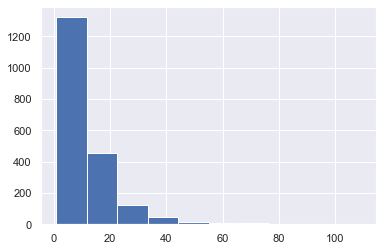

In [17]:
#Obtain the distribution of the number of words in each utterance:

#Concatenate all dataframes:
all_data = pd.concat(dfs)
all_data['Number of Words'].hist()

#Mean number:
print('Mean number of words per utterance: '+str(all_data['Number of Words'].mean()))

#A padding process will be done afterwards, fixing the utterance length will be set to 20:
print('#Utterances with > 20 words: '+str(len(all_data.loc[all_data['Number of Words']>20])))
print('#Utterances with < 20 words: '+str(len(all_data.loc[all_data['Number of Words']<20])))

This indicates that fixing the utterance length to 20 words will truncate 254 utterances and add zero-tokens to 1700 utterances, while the mean number of words per utterances is about 11 words.

In [18]:
#Join all documents:
docs = [' '.join(list(df['Utterance'].astype(str))) for df in dfs]
#Set a tokenizer (the character ? is considered as a new words, thus it is not filtered):
t = Tokenizer(filters='¡!"\'#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n')
#Fit the tokenizer:
t.fit_on_texts(docs)

In [19]:
#Get the last token number:
t.word_index.get(list(t.word_index)[-1])

3500

This means that our vocabulary has 3500 different words. 

In [20]:
#Top 30 most frequent words:
common_words = [key for key in list(t.word_index)[0:30]]
common_words_count = [t.word_counts.get(word) for word in common_words]
common_words_df = pd.DataFrame()
common_words_df['Words'] = common_words
common_words_df['Count'] = common_words_count
common_words_df = common_words_df.sort_values('Count',ascending=False)

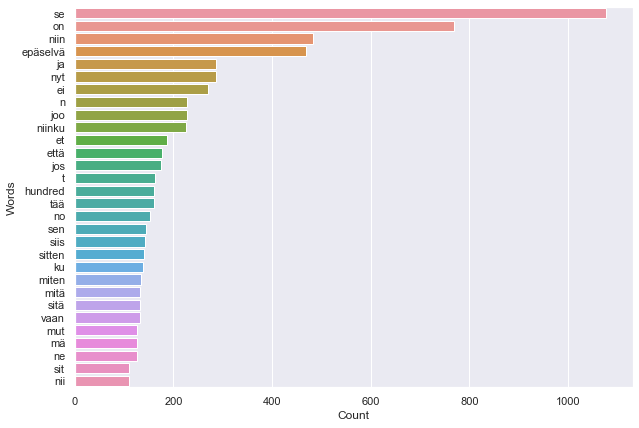

In [22]:
#Word frequency:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.barplot(y="Words", x="Count", data=common_words_df)

In [23]:
#List of Finnish physics concepts:
finnish_list = ['liike','nopeus','kiihtyvyys','voima','lämpö', 'lämpötila', 'entropia', 'entalpia',
                'teho', 'energia', 'sähkö', 'paine',
                'colyymi', 'kemialliset', 'mahdollinen',
                'carnot', 'maxwell', 'boltzmann', 'gibbs',
                'tyttö', 'mies', 'nainen', 'poika', 'aurinko',
                'kuu', 'työ','moottori','auto','ajoneuvo',
               'vesi','kaasu','valo','kone','sykli','termodynamiikka',
               'määrä','laskeminen','reaktio','höyry','ongelma','tilastollinen',
                'ilma','pumppu','laki','järjestelmä']

In [24]:
physics_words_count = [t.word_counts.get(word) for word in finnish_list]
physics_words_df = pd.DataFrame()
physics_words_df['Words'] = finnish_list
physics_words_df['Count'] = physics_words_count
physics_words_df = physics_words_df.sort_values('Count',ascending=False)

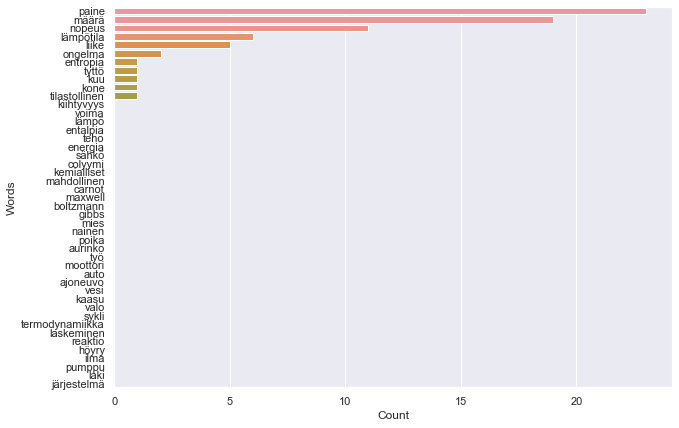

In [26]:
#Physics Word frequency:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.barplot(y="Words", x="Count", data=physics_words_df,)